In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cosine
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
import networkx as nx

In [2]:

# Load datasets
countries_df = pd.read_csv("data/countries.csv")
flavors_df = pd.read_csv("data/flavours.csv")
products_df = pd.read_csv("data/products.csv")
print(countries_df.head(1))
print(flavors_df.head(1))
print(products_df.head(1))

  COUNTRY_CODE_2_CHAR      NAME        REGION
0                  KH  Cambodia  Asia Pacific
   GNPD_PRODUCT_VARIANT_ID  GNPD_PRODUCT_FLAVOUR_BLEND  GNPD_FLAVOUR_ID  \
0                  5472359                           1              206   

  FLAVOUR_CATEGORY  
0     Citrus Fruit  
   GNPD_PRODUCT_VARIANT_ID COUNTRY_CODE_2_CHAR SUPERCATEGORY  \
0                  6833101                  CN          Food   

                    CATEGORY                SUBCATEGORY DATE_PUBLISHED  
0  Sugar & Gum Confectionery  Other Sugar Confectionery     2016-11-25  


In [3]:
# Ensure date conversion and add Year column
products_df["Year"] = pd.to_datetime(products_df["DATE_PUBLISHED"]).dt.year
products_df["Month"] = pd.to_datetime(products_df["DATE_PUBLISHED"]).dt.month

# presentation case 
Comparing super category food with plant flavor products from 2016-2020

{
    "Year" : [2016,2017,2018,2019,2020],
    "Month": None,
    "Region": None,
    "Country": None,
    "Super Category": "Food",
    "Product Category": None,
    "Flavor Category": "Plant"
}

In [ ]:
cluster_results

,FLAVOUR_CATEGORY,FLAVOUR_CATEGORY,SUPERCATEGORY,REGION,flavor_segment
1,Other Dairy,Other Dairy,Food,Asia Pacific,2
2,Other Savoury,Other Savoury,Food,Europe,1
3,Berry Fruit,Berry Fruit,Food,Europe,4
4,Sugar,Sugar,Food,Europe,3
5,Chocolate,Chocolate,Food,Latin America,2
...,...,...,...,...,...
1048567,Vegetable,Vegetable,Food,Europe,3
1048569,Spice,Spice,Food,Asia Pacific,3
1048570,Nut,Nut,Food,Asia Pacific,2
1048571,Nut,Nut,Food,Middle East & Africa,2


In [ ]:
trends

,Year,FLAVOUR_CATEGORY,count,trend_score
0,2015,Alcohol,771,NaN
1,2015,Bakery,1293,NaN
2,2015,Berry Fruit,5806,NaN
3,2015,Cereal,914,NaN
4,2015,Cheese,3097,NaN
...,...,...,...,...
328,2023,Sweet,321,0.048760
329,2023,Syrup,1119,-0.063415
330,2023,Tea,394,0.064658
331,2023,Tree,79,-0.065574


In [ ]:
replacements

,base,replacement,score
0,Alcohol,Coffee,0.999720
1,Alcohol,Spice,0.999253
2,Alcohol,Sugar,0.999170
3,Bakery,Other Flora,0.999479
4,Bakery,Dessert,0.998918
...,...,...,...
106,Tree,Sour,0.985618
107,Tree,Meat,0.985034
108,Vegetable,Chocolate,0.999865
109,Vegetable,Cheese,0.999801


flavor_trend_analysis:

Trend Analysis
1. Which flavors have shown the highest growth in popularity over time?
    * Use trend analysis to observe changes in trend scores for different flavors.
2. Are there seasonal patterns in the popularity of specific flavors?
    * Filter data by year and analyze trends over different periods.
3. Which flavor categories are declining in popularity?
    * Identify categories with negative trend scores over multiple years.



state_flavor_analysis: 

Clustering and Segmentation
1. How are flavors naturally grouped based on their characteristics?
    * Use clustering results to identify segments in flavor categories.
2. Do specific regions have distinct flavor clusters?
    * Compare cluster distributions across regions.
3. Are certain flavor segments associated with specific product supercategories?
    * Examine flavor clusters and their corresponding supercategories.
Flavor Substitutions and Similarity
1. What are the best alternative flavors for a given base flavor?
    * Use the similarity scores in the replacement analysis.
2. Which flavors are most frequently interchangeable in product formulations?
    * Look at replacement pairs with the highest similarity scores.
3. Do certain flavor categories have a wider range of replacement options?
    * Analyze the number of potential replacements per base flavor.
Regional and Market Insights
1. Which regions favor specific flavors the most?
    * Segment the dataset by region and analyze frequency distributions.
2. Are there region-specific trends in flavor popularity over time?
    * Combine trend analysis with regional segmentation.
Product-Level Analysis
1. How does the introduction of a new flavor impact existing flavors in the market?
    * Track the trend score changes before and after new flavors appear.

# build explaination

In [93]:
# Convert DATE_PUBLISHED to datetime and extract Year and Month
products_df["DATE_PUBLISHED"] = pd.to_datetime(products_df["DATE_PUBLISHED"])
products_df["Year"] = products_df["DATE_PUBLISHED"].dt.year
products_df["Month"] = products_df["DATE_PUBLISHED"].dt.month

# Merge datasets
merged_df = flavors_df.merge(
    products_df, on="GNPD_PRODUCT_VARIANT_ID", how="left"
).merge(
    countries_df, on="COUNTRY_CODE_2_CHAR", how="left"
)

# Filter based on given conditions
merged = merged_df[
    (merged_df["SUPERCATEGORY"] == "Food") & 
    (merged_df["FLAVOUR_CATEGORY"] == "Plant") &
    (merged_df["Year"].isin([2016, 2017, 2018, 2019, 2020]))
]


In [94]:
merged.head()

,GNPD_PRODUCT_VARIANT_ID,GNPD_PRODUCT_FLAVOUR_BLEND,GNPD_FLAVOUR_ID,FLAVOUR_CATEGORY,COUNTRY_CODE_2_CHAR,SUPERCATEGORY,CATEGORY,SUBCATEGORY,DATE_PUBLISHED,Year,Month,NAME,REGION
55,7313157,1,575,Plant,ID,Food,Bakery,Baking Ingredients & Mixes,2017-05-02,2017,5,Indonesia,Asia Pacific
418,8107117,1,4,Plant,JP,Food,Dairy,Drinking Yogurt & Liquid Cultured Milk,2017-12-04,2017,12,Japan,Asia Pacific
976,13357207,1,4819,Plant,CN,Food,Snacks,Vegetable Snacks,2020-12-30,2020,12,China,Asia Pacific
2291,9905161,1,5901,Plant,CN,Food,Snacks,Hors d'oeuvres/Canapes,2019-04-17,2019,4,China,Asia Pacific
2890,8223995,1,575,Plant,VN,Food,Sugar & Gum Confectionery,"Pastilles, Gums, Jellies & Chews",2018-01-11,2018,1,Vietnam,Asia Pacific


In [ ]:

def analyze_flavor_trends(merged, show_plots=True):
    """
    Automatically processes flavor trends, detecting available features dynamically.
    
    Parameters:

    - show_plots: Whether to display plots
    
    Returns:
    - Processed dataset with additional analysis columns
    - Dictionary of generated figures
    """

    # If no valid data remains, return empty
    if merged.empty:
        return pd.DataFrame(), {}

    # --- Identify Available Predictors ---
    available_columns = merged.columns.tolist()
    
    # Identify categorical and numerical features
    categorical_features = merged.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_features = merged.select_dtypes(include=['number']).columns.tolist()

    # Remove unwanted columns
    categorical_features = [col for col in categorical_features if col not in ['GNPD_PRODUCT_VARIANT_ID', 'COUNTRY_CODE_2_CHAR']]
    numerical_features = [col for col in numerical_features if col not in ['GNPD_PRODUCT_VARIANT_ID']]
    
    # Combine for clustering
    selected_features = categorical_features + numerical_features

    if not selected_features:
        raise ValueError("No suitable predictors found in dataset.")

    # --- Feature Encoding & Standardization ---
    le = LabelEncoder()
    for col in categorical_features:
        merged[f'{col}_encoded'] = le.fit_transform(merged[col].astype(str))
    
    # One-hot encode categorical features
    encoded_data = pd.get_dummies(merged[selected_features], drop_first=True)

    # Standardize numerical features
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(encoded_data)

    # --- Clustering ---
    """Finds the best k using the Elbow Method and returns optimal k."""
    
    # Determine max_k based on dataset size
    n_samples = merged.shape[0]
    max_k = min(int(np.sqrt(n_samples)), 15)  # Limit max_k to 15 for efficiency

    wcss = []  # Stores Within-Cluster Sum of Squares

    for k in range(2, max_k+1):  # Start from 2 since KMeans needs at least 2 clusters
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(standardized_data)
        wcss.append(kmeans.inertia_)  # Inertia = WCSS
    
    # Find the "elbow point" automatically
    curvature = np.diff(wcss, 2)  # Second derivative to detect inflection point
    best_k = range(2, max_k-1)[np.argmax(curvature)]  # Find max curvature point

    kmeans = KMeans(n_clusters=best_k, random_state=42)
    merged['flavor_segment'] = kmeans.fit_predict(standardized_data)
    
    if show_plots:
        plot_cluster_analysis(merged, standardized_data)

    return merged

# --------------------------
# Visualization Functions
# --------------------------

def plot_cluster_analysis(data, standardized_data):
    """Visualize flavor clusters using PCA reduction."""
    fig, ax = plt.subplots(figsize=(12, 6))

    # PCA Transformation
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(standardized_data)

    # Scatter Plot
    sns.scatterplot(
        x=reduced[:, 0], y=reduced[:, 1],
        hue=data['flavor_segment'],
        palette="tab10",  # High-contrast color scheme
        size=data.groupby('flavor_segment')['FLAVOUR_CATEGORY'].transform('count'),
        sizes=(50, 300),
        edgecolor='black',
        alpha=0.8, ax=ax
    )

    ax.set_title("PCA-Based Flavor Clusters")
    ax.set_xlabel("Principal Component 1 (Flavor Profile)")
    ax.set_ylabel("Principal Component 2 (Regional Influence)")
    plt.legend(title="Flavor Segment", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()
    return fig

/var/folders/mz/m3d6qq5179360gl20vnsvxch0000gn/T/ipykernel_37054/2626205925.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged[f'{col}_encoded'] = le.fit_transform(merged[col].astype(str))
/var/folders/mz/m3d6qq5179360gl20vnsvxch0000gn/T/ipykernel_37054/2626205925.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged[f'{col}_encoded'] = le.fit_transform(merged[col].astype(str))
/var/folders/mz/m3d6qq5179360gl20vnsvxch0000gn/T/ipykernel_37054/2626205925.py:43: SettingWithCopyWarning: 
A value 

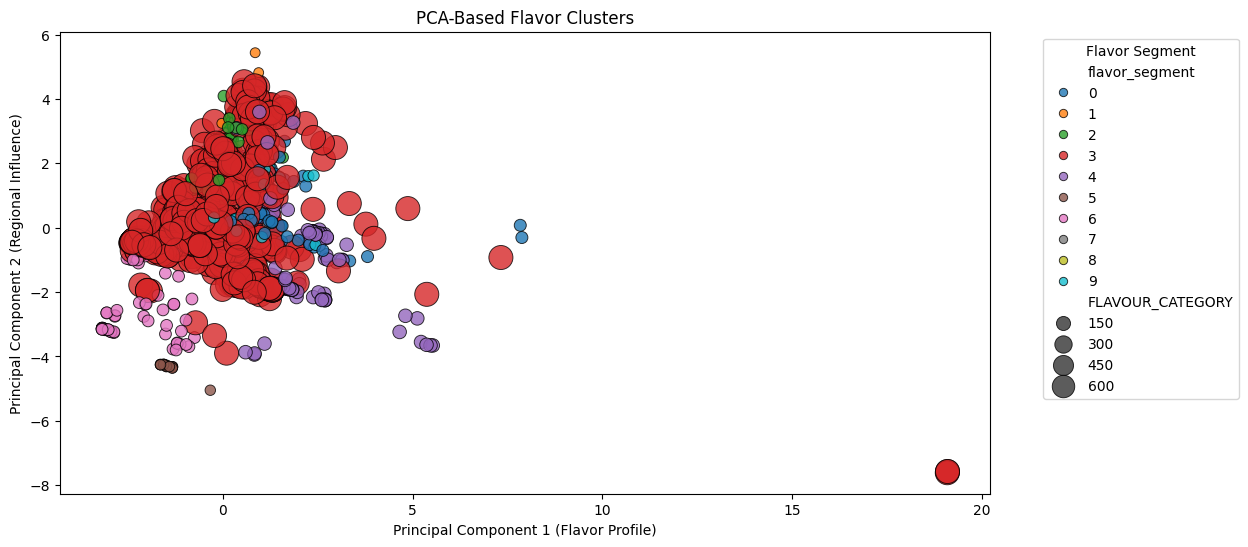

,GNPD_PRODUCT_VARIANT_ID,GNPD_PRODUCT_FLAVOUR_BLEND,GNPD_FLAVOUR_ID,FLAVOUR_CATEGORY,COUNTRY_CODE_2_CHAR,SUPERCATEGORY,CATEGORY,SUBCATEGORY,DATE_PUBLISHED,Year,Month,NAME,REGION,FLAVOUR_CATEGORY_encoded,SUPERCATEGORY_encoded,CATEGORY_encoded,SUBCATEGORY_encoded,NAME_encoded,REGION_encoded,flavor_segment
55,7313157,1,575,Plant,ID,Food,Bakery,Baking Ingredients & Mixes,2017-05-02,2017,5,Indonesia,Asia Pacific,0,0,1,6,28,0,3
418,8107117,1,4,Plant,JP,Food,Dairy,Drinking Yogurt & Liquid Cultured Milk,2017-12-04,2017,12,Japan,Asia Pacific,0,0,4,22,31,0,3
976,13357207,1,4819,Plant,CN,Food,Snacks,Vegetable Snacks,2020-12-30,2020,12,China,Asia Pacific,0,0,12,87,11,0,3
2291,9905161,1,5901,Plant,CN,Food,Snacks,Hors d'oeuvres/Canapes,2019-04-17,2019,4,China,Asia Pacific,0,0,12,34,11,0,4
2890,8223995,1,575,Plant,VN,Food,Sugar & Gum Confectionery,"Pastilles, Gums, Jellies & Chews",2018-01-11,2018,1,Vietnam,Asia Pacific,0,0,14,57,71,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045583,11646623,1,586,Plant,CZ,Food,Breakfast Cereals,Hot Cereals,2019-11-11,2019,11,Czech Republic,Europe,0,0,2,35,15,1,3
1045910,8800805,3,3615,Plant,VN,Food,"Processed Fish, Meat & Egg Products",Fish Products,2018-06-18,2018,6,Vietnam,Asia Pacific,0,0,8,25,71,0,3
1046421,12747447,1,8305,Plant,SG,Food,Snacks,Hors d'oeuvres/Canapes,2020-06-26,2020,6,Singapore,Asia Pacific,0,0,12,34,55,0,4
1047365,9575159,3,678,Plant,CN,Food,Sugar & Gum Confectionery,Other Sugar Confectionery,2019-01-15,2019,1,China,Asia Pacific,0,0,14,54,11,0,2


In [74]:
analyze_flavor_trends(merged, show_plots=True)

In [104]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def find_top_replacements(merged_df, base_flavor=None, top_replacements=3, show_plot=False):
    """
    Finds the top replacement flavors based on cosine similarity.

    Parameters:
    - merged_df: DataFrame containing product and flavor data.
    - base_flavor: Specific FLAVOUR_CATEGORY to find replacements for (optional).
    - top_replacements: Number of top replacements to return per flavor (default is 3).
    - show_plot: Whether to generate a network plot.

    Returns:
    - replacement_df: DataFrame containing the best replacements for each flavor.
    """

    # Pivot the table to have years as columns and flavor categories as rows
    pivot_table = merged_df.pivot_table(index='FLAVOUR_CATEGORY', columns='Year', 
                                        values='GNPD_PRODUCT_VARIANT_ID', aggfunc='count').fillna(0)

    # Compute cosine similarity between all flavors
    flavor_names = pivot_table.index
    similarity_matrix = cosine_similarity(pivot_table)
    similarity_df = pd.DataFrame(similarity_matrix, index=flavor_names, columns=flavor_names)

    replacement_data = []

    # If base_flavor is given, find replacements for only that
    flavors_to_process = [base_flavor] if base_flavor else flavor_names
    
    for flavor in flavors_to_process:
        print(f"Processing {flavor} flavors...")
        if flavor not in similarity_df.index:
            print(f"Warning: {flavor} not found in data. Skipping...")
            continue  # Skip if flavor is missing

        # Sort by similarity score, exclude self
        similar_flavors = similarity_df[flavor].drop(flavor).sort_values(ascending=False)
        top_matches = similar_flavors.head(top_replacements)

        replacement_data.extend([
            {'base': flavor, 'replacement': replacement, 'score': score}
            for replacement, score in top_matches.items()
        ])

    replacement_df = pd.DataFrame(replacement_data)

    # Generate network plot if requested
    if show_plot and not replacement_df.empty:
        plot_replacement_network(replacement_df)

    return replacement_df


def plot_replacement_network(replacement_df):
    """Create a network graph of flavor replacements."""
    fig, ax = plt.subplots(figsize=(14, 10))

    G = nx.from_pandas_edgelist(replacement_df, source='base', target='replacement', edge_attr='score')

    degrees = dict(G.degree())
    node_sizes = [degrees[node] * 120 for node in G.nodes()]
    node_colors = plt.cm.Paired(np.linspace(0, 1, len(G.nodes())))

    pos = nx.spring_layout(G, k=0.7)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, edgecolors='black', alpha=0.85, ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=0.6, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', ax=ax)

    ax.set_title("Flavor Replacement Network (Similarity-Based)")
    plt.axis('off')
    plt.show()

    return fig



In [102]:
merged

,GNPD_PRODUCT_VARIANT_ID,GNPD_PRODUCT_FLAVOUR_BLEND,GNPD_FLAVOUR_ID,FLAVOUR_CATEGORY,COUNTRY_CODE_2_CHAR,SUPERCATEGORY,CATEGORY,SUBCATEGORY,DATE_PUBLISHED,Year,Month,NAME,REGION
55,7313157,1,575,Plant,ID,Food,Bakery,Baking Ingredients & Mixes,2017-05-02,2017,5,Indonesia,Asia Pacific
418,8107117,1,4,Plant,JP,Food,Dairy,Drinking Yogurt & Liquid Cultured Milk,2017-12-04,2017,12,Japan,Asia Pacific
976,13357207,1,4819,Plant,CN,Food,Snacks,Vegetable Snacks,2020-12-30,2020,12,China,Asia Pacific
2291,9905161,1,5901,Plant,CN,Food,Snacks,Hors d'oeuvres/Canapes,2019-04-17,2019,4,China,Asia Pacific
2890,8223995,1,575,Plant,VN,Food,Sugar & Gum Confectionery,"Pastilles, Gums, Jellies & Chews",2018-01-11,2018,1,Vietnam,Asia Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045583,11646623,1,586,Plant,CZ,Food,Breakfast Cereals,Hot Cereals,2019-11-11,2019,11,Czech Republic,Europe
1045910,8800805,3,3615,Plant,VN,Food,"Processed Fish, Meat & Egg Products",Fish Products,2018-06-18,2018,6,Vietnam,Asia Pacific
1046421,12747447,1,8305,Plant,SG,Food,Snacks,Hors d'oeuvres/Canapes,2020-06-26,2020,6,Singapore,Asia Pacific
1047365,9575159,3,678,Plant,CN,Food,Sugar & Gum Confectionery,Other Sugar Confectionery,2019-01-15,2019,1,China,Asia Pacific


In [ ]:
# Example usage - since it's only Plant flavor we can't do the similarity check 
replacement_df = find_top_replacements(merged)
replacement_df

Processing Plant flavors...


""


Processing Plant flavors...


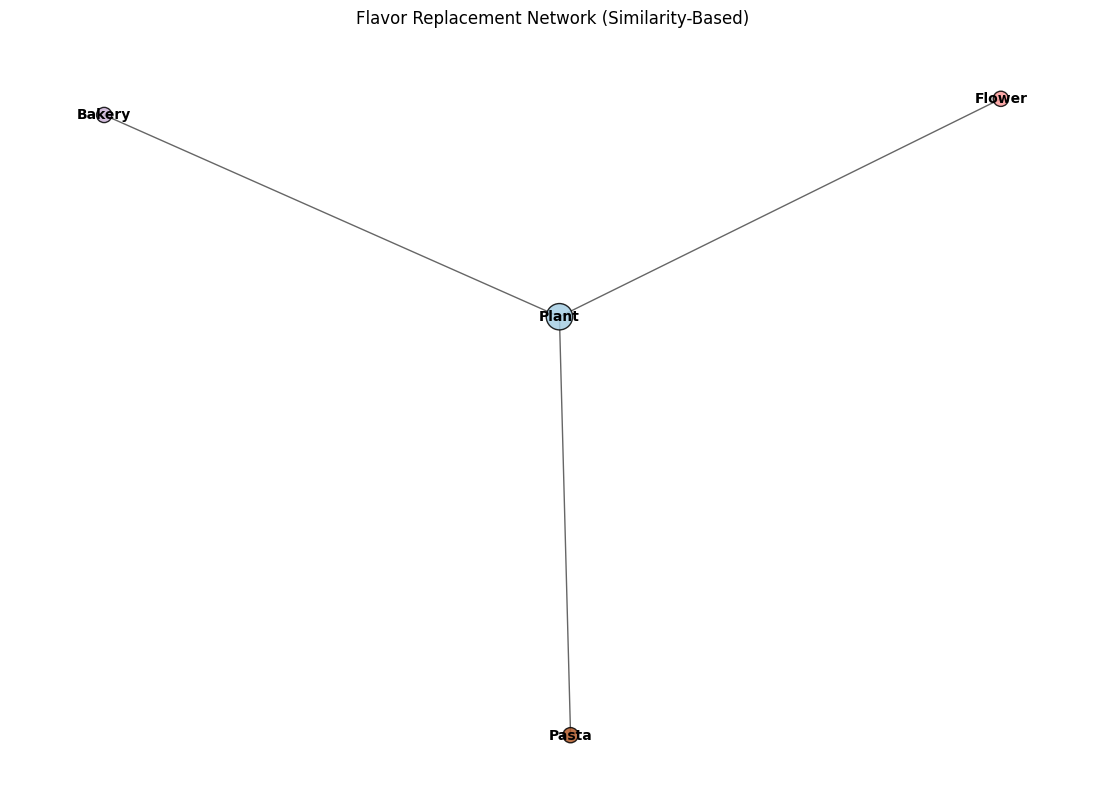

    base replacement     score
0  Plant      Flower  0.998115
1  Plant      Bakery  0.997292
2  Plant       Pasta  0.997265


In [108]:
# use whole dataset with plant as base flavor
replacement_df = find_top_replacements(merged_df, base_flavor="Plant", top_replacements=3,show_plot=True)
print(replacement_df)

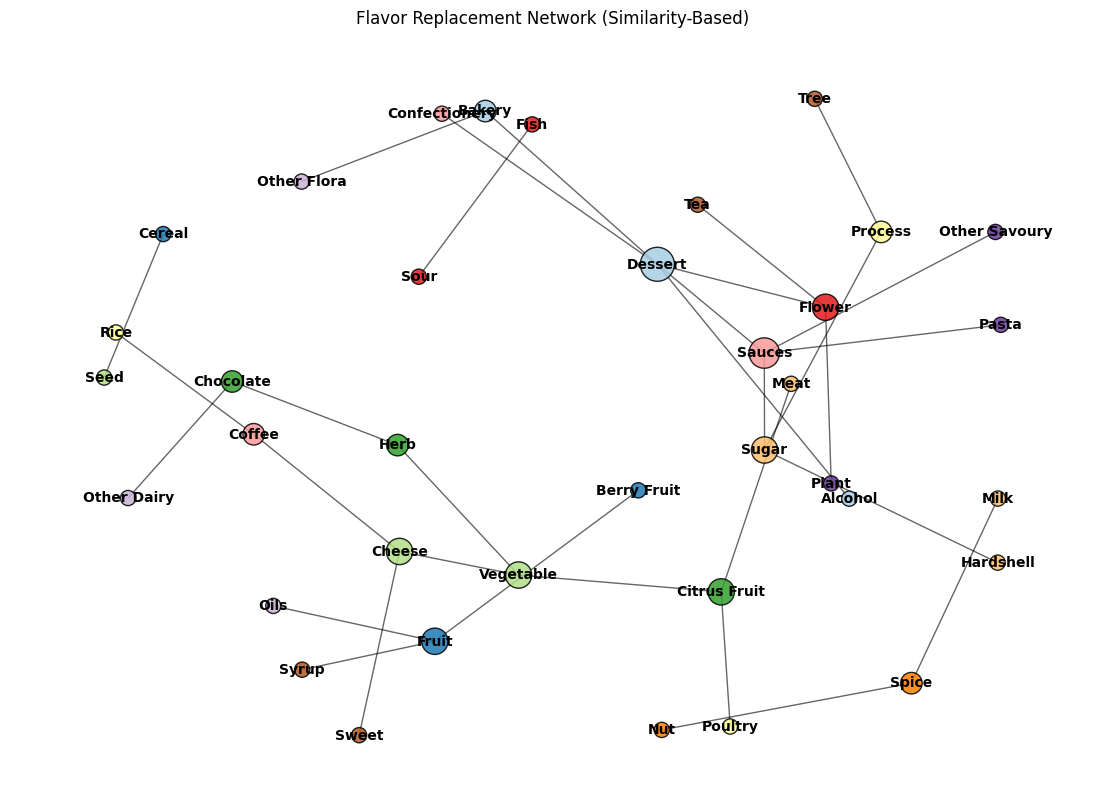

,base,replacement,score
0,Alcohol,Dessert,0.998140
1,Bakery,Dessert,0.998988
2,Berry Fruit,Fruit,0.999778
3,Cereal,Seed,0.998833
4,Cheese,Vegetable,0.999814
5,Chocolate,Herb,0.999667
6,Citrus Fruit,Vegetable,0.999847
7,Coffee,Cheese,0.999136
8,Confectionery,Dessert,0.998569
9,Dessert,Sauces,0.999629


In [ ]:
# use whole dataset without indicating base flavor - each flavor wil have one top replacement recommendation
replacement_df = find_top_replacements(merged_df, top_replacements=1,show_plot = True)
replacement_df


In [ ]:
replacement_df = find_top_replacements(merged, top_replacements=3,show_plot = True)
replacement_df

In [ ]:
def determine_threshold(flavor_trend_country):
    """
    Determines a dynamic threshold based on the mean and standard deviation of the flavor proportions.
    """
    mean_proportion = flavor_trend_country.stack().mean()
    std_dev = flavor_trend_country.stack().std()
    return max(0.01, mean_proportion - std_dev)

def plot_flavor_trend(flavor_trend_country, trend_type="both"):
    """
    Plots the trend of a given flavor category across different countries over time,
    allowing selection of diminishing, increasing, or both trends.
    """
    plt.figure(figsize=(12, 6))
    
    for country in flavor_trend_country.columns:
        trend = flavor_trend_country[country].diff().mean()
        if (trend_type == "diminishing" and trend < 0) or (trend_type == "increasing" and trend > 0) or (trend_type == "both"):
            plt.plot(flavor_trend_country.index, flavor_trend_country[country], marker='o', label=country)
    
    plt.xlabel("Year")
    plt.ylabel("Proportion of Products with Flavor")
    plt.title(f"Flavor Trend Over Time by Country ({trend_type.capitalize()} Trends)")
    plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

def analyze_flavor_trend(merged_df, threshold=None, trend_type="both", show_plot=True):
    """
    Analyzes the trend of a given flavor category in a specific product category over time,
    considering country-specific trends, while handling missing values.
    
    Parameters:
        merged_df (pd.DataFrame): Pre-merged DataFrame containing product and flavor details.
        years (list, optional): List of years to analyze. If None, all years are included.
        threshold (float, optional): Proportion threshold below which the flavor is considered diminishing.
                                     If None, it is dynamically determined based on historical data.
        trend_type (str, optional): Type of trend to analyze ("diminishing", "increasing", or "both").
                                    Defaults to "both".
    
    Returns:
        dict: Dictionary containing analysis of whether the flavor is diminishing or well-established,
              including country-specific trends.
    """

    
    # Ensure Year column exists or generate it if missing
    if "Year" not in merged_df.columns:
        merged_df["Year"] = merged_df["DATE_PUBLISHED"].dt.year
    
    # Count total products per year across the whole region
    total_per_year_region = merged_df.groupby("Year").size()

    # Count products with a given flavor per year per country
    flavor_per_year_country = merged_df[merged_df["FLAVOUR_CATEGORY"].notna()].groupby(["Year", "NAME"]).size().unstack()

    # Normalize by total products per year across the whole region
    flavor_trend_country = (flavor_per_year_country.div(total_per_year_region, axis=0)).fillna(0)

    
    # Determine threshold dynamically if not provided
    if threshold is None:
        threshold = determine_threshold(flavor_trend_country)
    
    # Ensure there is enough data for analysis
    if flavor_trend_country.shape[0] < 2:
        return {"error": "Insufficient data for trend analysis."}
    
    # Determine trends per country
    diminishing_countries = (flavor_trend_country.iloc[-1] < threshold) & (flavor_trend_country.diff().mean() < 0)
    well_established_countries = (flavor_trend_country.mean() > threshold)
    
    # Plot trends based on user-selected trend type
    if show_plot:
        plot_flavor_trend(flavor_trend_country, trend_type)
    
    return {
        "recent_trend": flavor_trend_country.to_dict(),
        "diminishing_countries": diminishing_countries[diminishing_countries].index.tolist() if trend_type in ["diminishing", "both"] else [],
        "well_established_countries": well_established_countries[well_established_countries].index.tolist() if trend_type in ["increasing", "both"] else [],
        "threshold": threshold
    }


In [11]:
# Convert DATE_PUBLISHED to datetime and extract Year and Month
products_df["DATE_PUBLISHED"] = pd.to_datetime(products_df["DATE_PUBLISHED"])
products_df["Year"] = products_df["DATE_PUBLISHED"].dt.year
products_df["Month"] = products_df["DATE_PUBLISHED"].dt.month

# Merge datasets
merged_df = flavors_df.merge(
    products_df, on="GNPD_PRODUCT_VARIANT_ID", how="left"
).merge(
    countries_df, on="COUNTRY_CODE_2_CHAR", how="left"
)

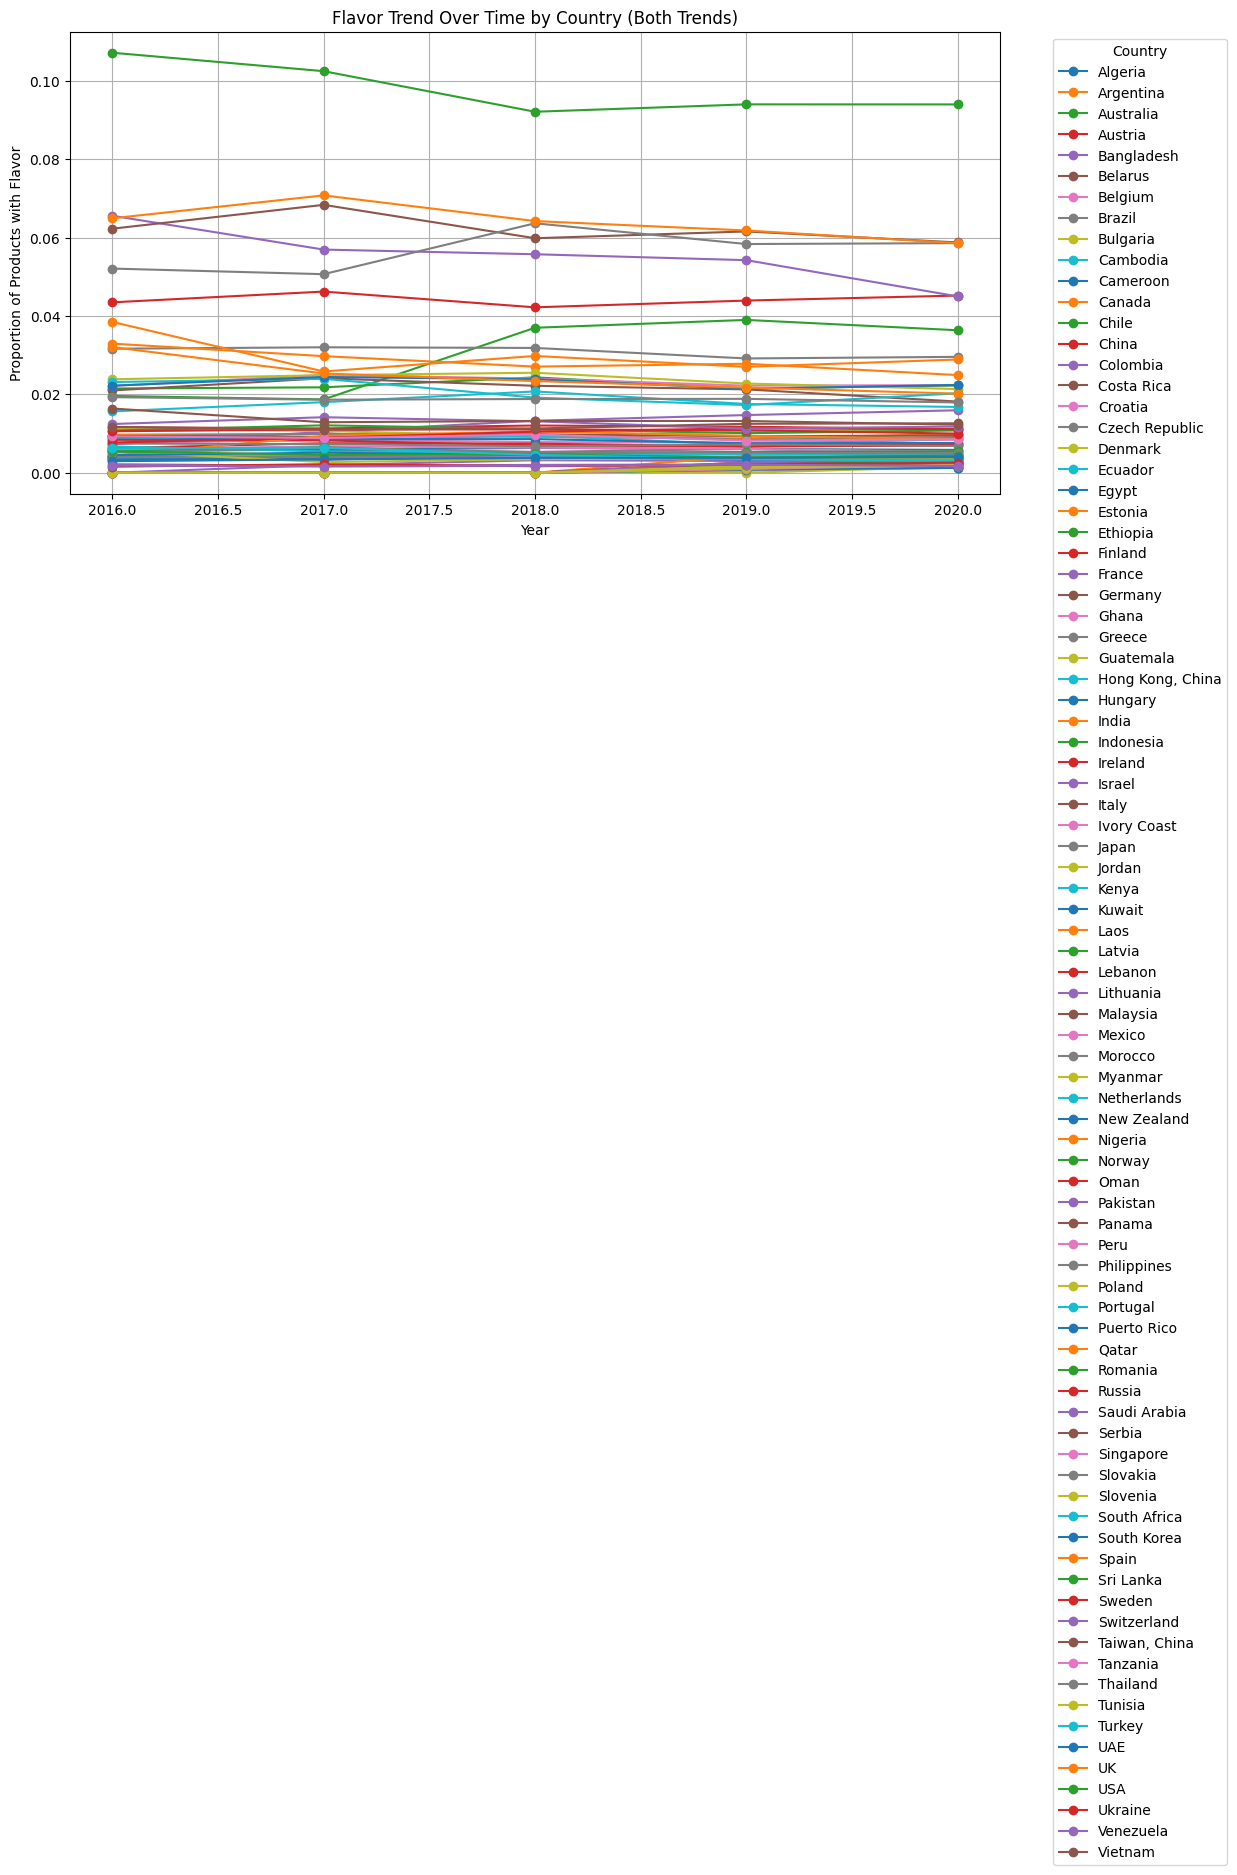

{'recent_trend': {'Algeria': {2016: 0.0,
   2017: 0.0,
   2018: 0.0,
   2019: 0.0009025445934667417,
   2020: 0.0012153597364376902},
  'Argentina': {2016: 0.009716292451188173,
   2017: 0.009920013365912746,
   2018: 0.009085889262587219,
   2019: 0.008744007297994993,
   2020: 0.009883586616980886},
  'Australia': {2016: 0.019586161706135904,
   2017: 0.01870183572457866,
   2018: 0.03698609507554842,
   2019: 0.038984103569418296,
   2020: 0.03635030484436364},
  'Austria': {2016: 0.01162064481780672,
   2017: 0.01129837311780799,
   2018: 0.012047587972491341,
   2019: 0.011733079715067643,
   2020: 0.011088902058076116},
  'Bangladesh': {2016: 0.0,
   2017: 0.0019422341958523902,
   2018: 0.0031825711560664626,
   2019: 0.0029987771976475613,
   2020: 0.003495414779176167},
  'Belarus': {2016: 0.0,
   2017: 0.0,
   2018: 0.0,
   2019: 0.0018827274315327731,
   2020: 0.00280235840054641},
  'Belgium': {2016: 0.007535501837802419,
   2017: 0.008437232420692104,
   2018: 0.0078208925

In [22]:
analyze_flavor_trend(merged, threshold=None, trend_type="both", show_plot=True)

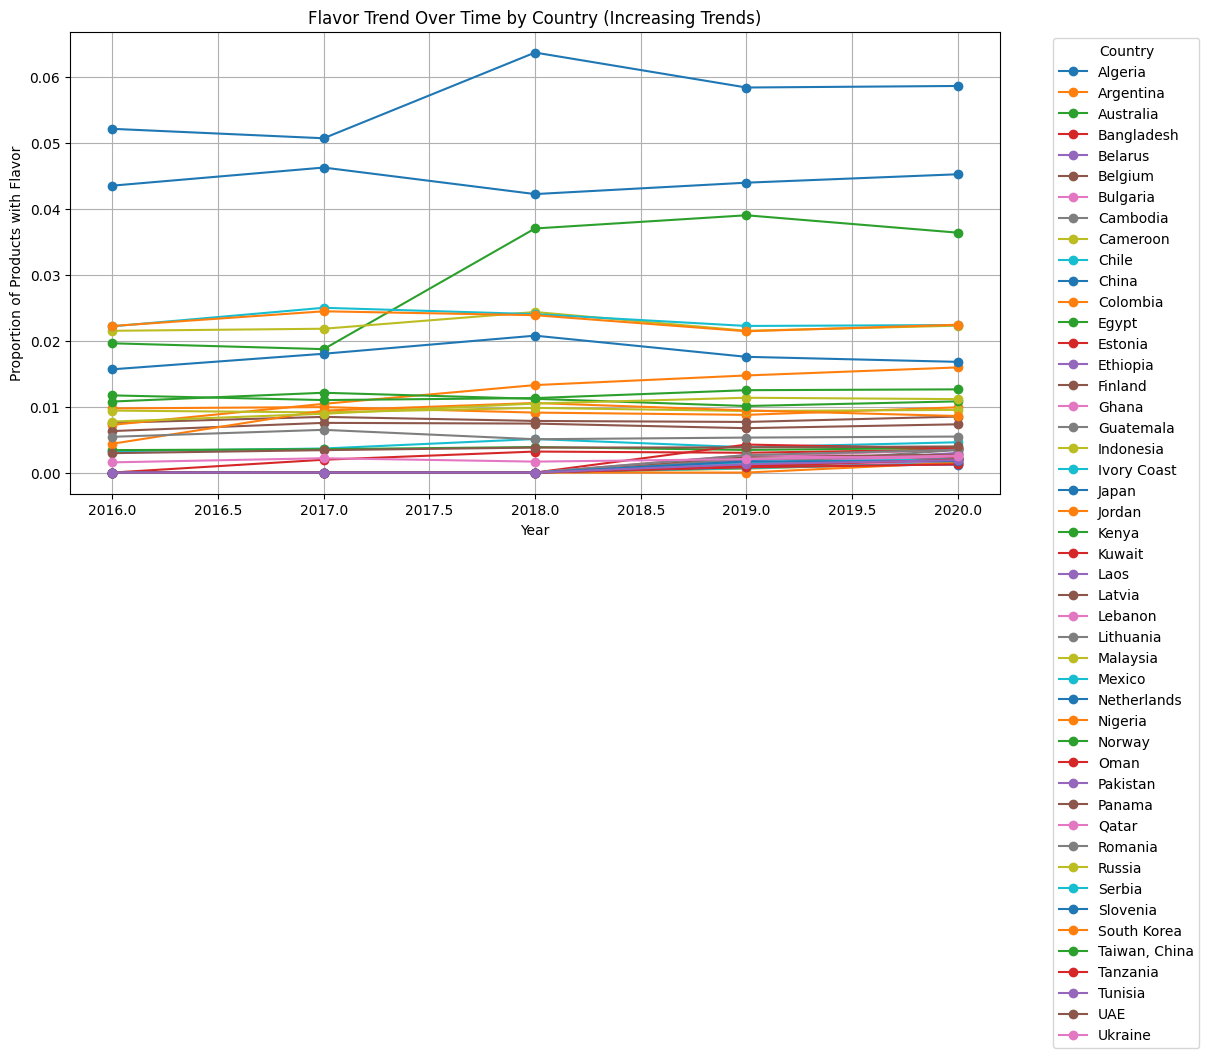

{'recent_trend': {'Algeria': {2016: 0.0,
   2017: 0.0,
   2018: 0.0,
   2019: 0.0009025445934667417,
   2020: 0.0012153597364376902},
  'Argentina': {2016: 0.009716292451188173,
   2017: 0.009920013365912746,
   2018: 0.009085889262587219,
   2019: 0.008744007297994993,
   2020: 0.009883586616980886},
  'Australia': {2016: 0.019586161706135904,
   2017: 0.01870183572457866,
   2018: 0.03698609507554842,
   2019: 0.038984103569418296,
   2020: 0.03635030484436364},
  'Austria': {2016: 0.01162064481780672,
   2017: 0.01129837311780799,
   2018: 0.012047587972491341,
   2019: 0.011733079715067643,
   2020: 0.011088902058076116},
  'Bangladesh': {2016: 0.0,
   2017: 0.0019422341958523902,
   2018: 0.0031825711560664626,
   2019: 0.0029987771976475613,
   2020: 0.003495414779176167},
  'Belarus': {2016: 0.0,
   2017: 0.0,
   2018: 0.0,
   2019: 0.0018827274315327731,
   2020: 0.00280235840054641},
  'Belgium': {2016: 0.007535501837802419,
   2017: 0.008437232420692104,
   2018: 0.0078208925

In [23]:
analyze_flavor_trend(merged, threshold=None, trend_type="increasing", show_plot=True)

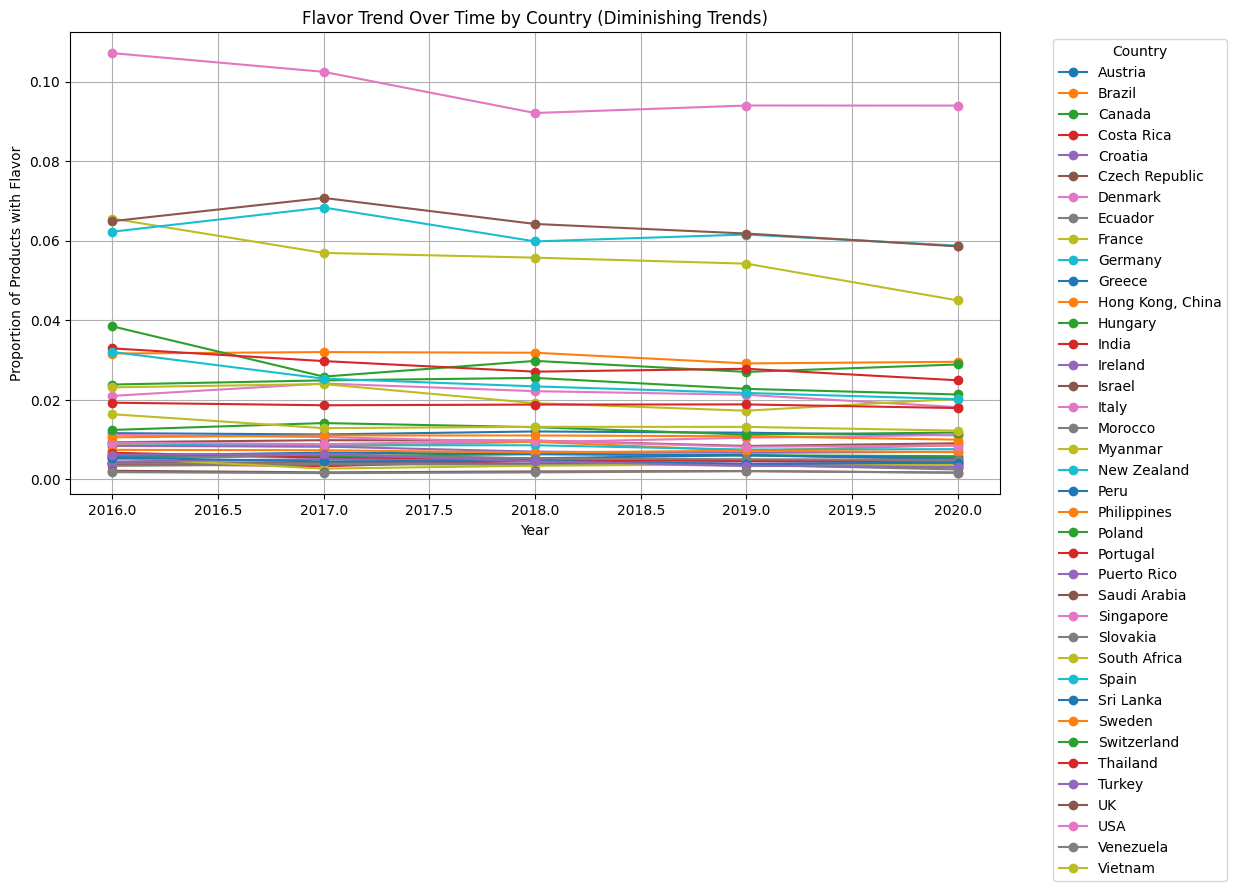

{'recent_trend': {'Algeria': {2016: 0.0,
   2017: 0.0,
   2018: 0.0,
   2019: 0.0009025445934667417,
   2020: 0.0012153597364376902},
  'Argentina': {2016: 0.009716292451188173,
   2017: 0.009920013365912746,
   2018: 0.009085889262587219,
   2019: 0.008744007297994993,
   2020: 0.009883586616980886},
  'Australia': {2016: 0.019586161706135904,
   2017: 0.01870183572457866,
   2018: 0.03698609507554842,
   2019: 0.038984103569418296,
   2020: 0.03635030484436364},
  'Austria': {2016: 0.01162064481780672,
   2017: 0.01129837311780799,
   2018: 0.012047587972491341,
   2019: 0.011733079715067643,
   2020: 0.011088902058076116},
  'Bangladesh': {2016: 0.0,
   2017: 0.0019422341958523902,
   2018: 0.0031825711560664626,
   2019: 0.0029987771976475613,
   2020: 0.003495414779176167},
  'Belarus': {2016: 0.0,
   2017: 0.0,
   2018: 0.0,
   2019: 0.0018827274315327731,
   2020: 0.00280235840054641},
  'Belgium': {2016: 0.007535501837802419,
   2017: 0.008437232420692104,
   2018: 0.0078208925

In [24]:
analyze_flavor_trend(merged, threshold=None, trend_type="diminishing", show_plot=True)

previous code:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
import networkx as nx

def analyze_flavor_trends(products_df, flavors_df, countries_df,
                         supercategory=None, flavor_category=None, 
                         years=None, region=None, trend=None,
                         n_clusters=5, top_replacements=3,
                         plot_types=None, show_plots=True):
    """
    Enhanced flavor analysis with integrated visualization capabilities.
    """
    # --- Data Processing ---
    products_df = products_df.copy()
    products_df['Year'] = pd.to_datetime(products_df['DATE_PUBLISHED']).dt.year

    merged = flavors_df.merge(
        products_df[['GNPD_PRODUCT_VARIANT_ID', 'Year', 'SUPERCATEGORY', 'COUNTRY_CODE_2_CHAR']],
        on='GNPD_PRODUCT_VARIANT_ID',
        how='left'
    ).merge(
        countries_df[['COUNTRY_CODE_2_CHAR', 'REGION']],
        on='COUNTRY_CODE_2_CHAR',
        how='left'
    )

    # Apply filters
    filter_conditions = [
        (supercategory, 'SUPERCATEGORY'),
        (flavor_category, 'FLAVOUR_CATEGORY'),
        (years, 'Year'),
        (region, 'REGION')
    ]
    
    
    for value, col in filter_conditions:
        if value:
            merged = merged[merged[col].isin(value)] if isinstance(value, list) else merged[merged[col] == value]

    if merged.empty:
        return pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), {}

    # --- Feature Encoding & Standardization ---
    cluster_features = [col for col in ['FLAVOUR_CATEGORY', 'SUPERCATEGORY', 'REGION'] if col in merged.columns]
    
    le = LabelEncoder()
    for col in cluster_features:
        merged[f'{col}_encoded'] = le.fit_transform(merged[col].astype(str))
    
    # One-hot encode categorical variables instead of label encoding
    encoded_data = pd.get_dummies(merged[cluster_features], drop_first=True)

    # Standardize numerical features only
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(encoded_data)

    # --- Clustering ---
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    merged['flavor_segment'] = kmeans.fit_predict(standardized_data)
    cluster_results = merged[['FLAVOUR_CATEGORY'] + cluster_features + ['flavor_segment']]

    # --- Visualization ---
    figures = {}
    if plot_types is None:
        plot_types = ['cluster', 'trend', 'replacement']

    if 'cluster' in plot_types:
        figures['cluster'] = plot_cluster_analysis(merged, standardized_data, show_plots)

    # --- Trend Analysis ---
    trend_df = merged.groupby(['Year', 'FLAVOUR_CATEGORY']).size().reset_index(name='count')
    trend_df['trend_score'] = trend_df.groupby('FLAVOUR_CATEGORY')['count'].transform(lambda x: x.ewm(span=2).mean().pct_change())

    # --- Replacement Analysis ---
    pivot_table = trend_df.pivot(index='FLAVOUR_CATEGORY', columns='Year', values='count').fillna(0)
    replacement_data = []
    
    for flavor in pivot_table.index:
        similarities = {other: 1 - cosine(pivot_table.loc[flavor], pivot_table.loc[other]) 
                        for other in pivot_table.index if other != flavor}
        top_matches = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:top_replacements]
        replacement_data.extend([{'base': flavor, 'replacement': m[0], 'score': m[1]} for m in top_matches])
    
    replacement_df = pd.DataFrame(replacement_data)

    if 'trend' in plot_types:
        figures['trend'] = plot_trend_analysis(trend_df, show_plots)
    
    if 'replacement' in plot_types:
        figures['replacement'] = plot_replacement_network(replacement_df, merged, show_plots)

    return cluster_results, trend_df, replacement_df, figures


# --------------------------
# Visualization Functions
# --------------------------

def plot_cluster_analysis(data, standardized_data, show=True):
    """Visualize flavor clusters using PCA reduction."""
    fig, ax = plt.subplots(figsize=(12, 6))

    # PCA Transformation
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(standardized_data)

    # Scatter Plot
    sns.scatterplot(
        x=reduced[:, 0], y=reduced[:, 1],
        hue=data['flavor_segment'],
        palette="tab10",  # High-contrast color scheme
        size=data.groupby('flavor_segment')['FLAVOUR_CATEGORY'].transform('count'),
        sizes=(50, 300),
        edgecolor='black',
        alpha=0.8, ax=ax
    )

    ax.set_title("PCA-Based Flavor Clusters")
    ax.set_xlabel("Principal Component 1 (Flavor Profile)")
    ax.set_ylabel("Principal Component 2 (Regional Influence)")
    plt.legend(title="Flavor Segment", bbox_to_anchor=(1.05, 1), loc='upper left')

    if show:
        plt.show()
    return fig


def plot_trend_analysis(trend_df, show=True):
    """Visualize flavor trends over time."""
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.lineplot(
        data=trend_df, x='Year', y='trend_score',
        hue='FLAVOUR_CATEGORY', marker='o', ax=ax
    )

    ax.set_title("Flavor Trend Evolution Over Time")
    ax.set_ylabel("Trend Score (Smoothed)")
    ax.axhline(0, color='gray', linestyle='--')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    if show:
        plt.show()
    return fig


def plot_replacement_network(replacement_df, merged_df, show=True):
    """Create a network graph of flavor replacements."""
    fig, ax = plt.subplots(figsize=(14, 10))

    G = nx.from_pandas_edgelist(replacement_df, source='base', target='replacement', edge_attr='score')

    # Cluster Mapping for Colors
    flavor_clusters = merged_df.set_index('FLAVOUR_CATEGORY')['flavor_segment'].to_dict()
    unique_clusters = list(set(flavor_clusters.values()))
    cluster_cmap = plt.cm.get_cmap('tab10', len(unique_clusters))
    cluster_colors = {cluster: cluster_cmap(i) for i, cluster in enumerate(unique_clusters)}

    # Assign Colors and Node Sizes
    node_colors = [cluster_colors.get(flavor_clusters.get(node, -1), 'gray') for node in G.nodes()]
    degrees = dict(G.degree())
    node_sizes = [degrees[node] * 120 for node in G.nodes()]

    pos = nx.spring_layout(G, k=0.7)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, edgecolors='black', alpha=0.85, ax=ax)
    nx.draw_networkx_edges(G, pos, alpha=0.6, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', ax=ax)

    ax.set_title("Flavor Replacement Network (Similarity-Based)")
    plt.axis('off')

    if show:
        plt.show()
    return fig
